In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

import autoencoder_train
import network
import utils

/home/cjw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
datadir = "/v/Data/cyto/mmFromTifs/"
#datadir = "/home/cjw/disk2cjw/Data/yeast/"
mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/v/Data/cyto/mmFromTifs/Fish6_CCB.mm', '/v/Data/cyto/mmFromTifs/Fish6_ICE.mm', '/v/Data/cyto/mmFromTifs/Fish6_Untreated.mm']
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
30000


dict_keys(['Fish6_CCB.mm', 'Fish6_ICE.mm', 'Fish6_Untreated.mm'])

In [3]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

10000
10000
10000


In [4]:
p_df.head(), p_df.tail()

(   column  fid  field       file  id        mmfile  plate  row  well  xc  yc
 0       0    0      0  Fish6_CCB   0  Fish6_CCB.mm      0    0     0  32  32
 1       0    1      0  Fish6_CCB   1  Fish6_CCB.mm      0    0     0  32  32
 2       0    2      0  Fish6_CCB   2  Fish6_CCB.mm      0    0     0  32  32
 3       0    3      0  Fish6_CCB   3  Fish6_CCB.mm      0    0     0  32  32
 4       0    4      0  Fish6_CCB   4  Fish6_CCB.mm      0    0     0  32  32,
        column   fid  field             file     id              mmfile  plate  \
 29995       0  9995      0  Fish6_Untreated  29995  Fish6_Untreated.mm      0   
 29996       0  9996      0  Fish6_Untreated  29996  Fish6_Untreated.mm      0   
 29997       0  9997      0  Fish6_Untreated  29997  Fish6_Untreated.mm      0   
 29998       0  9998      0  Fish6_Untreated  29998  Fish6_Untreated.mm      0   
 29999       0  9999      0  Fish6_Untreated  29999  Fish6_Untreated.mm      0   
 
        row  well  xc  yc  
 29995   

Encoder True
[<tf.Tensor 'Placeholder:0' shape=(?, 32, 32, 1) dtype=float32>, <tf.Tensor 'dropout/mul:0' shape=(?, 16, 16, 64) dtype=float32>, <tf.Tensor 'dropout_1/mul:0' shape=(?, 8, 8, 128) dtype=float32>, <tf.Tensor 'dropout_2/mul:0' shape=(?, 4, 4, 256) dtype=float32>] Tensor("latent_space/BiasAdd:0", shape=(?, 128), dtype=float32)
isize:  4 32
[<tf.Tensor 'dropout_3/mul:0' shape=(?, 4096) dtype=float32>, <tf.Tensor 'Reshape:0' shape=(?, 4, 4, 256) dtype=float32>, <tf.Tensor 'dropout_4/mul:0' shape=(?, 8, 8, 128) dtype=float32>, <tf.Tensor 'dropout_5/mul:0' shape=(?, 16, 16, 64) dtype=float32>] Tensor("decoder_out/BiasAdd:0", shape=(?, 32, 32, 1), dtype=float32)
30000 468 64
Epoch:  0 Iteration:  0 Loss:  41.821712


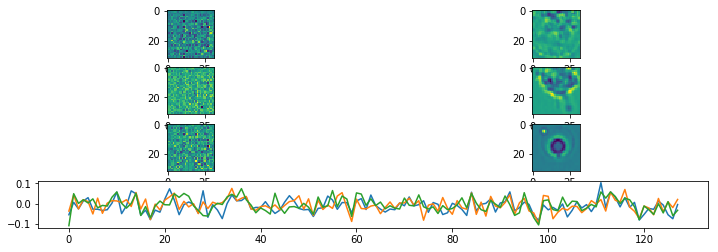

Epoch:  1 Iteration:  0 Loss:  2.5564141


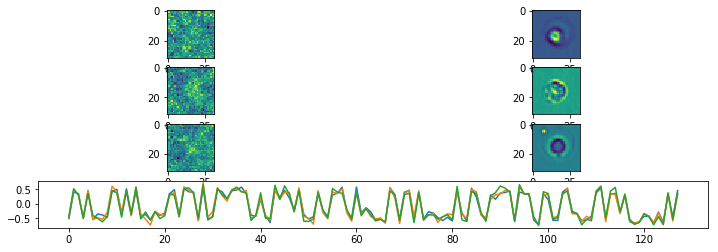

Epoch:  2 Iteration:  0 Loss:  2.2553015


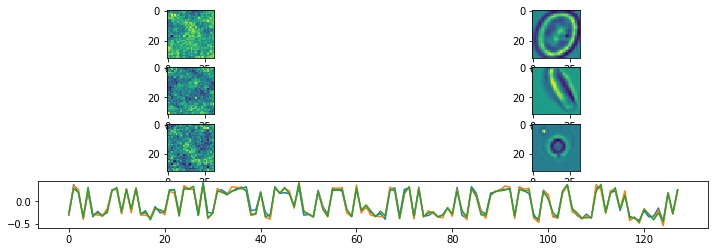

Epoch:  3 Iteration:  0 Loss:  2.1896796


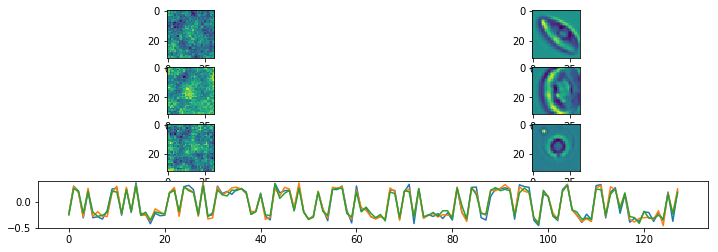

Epoch:  4 Iteration:  0 Loss:  2.036891


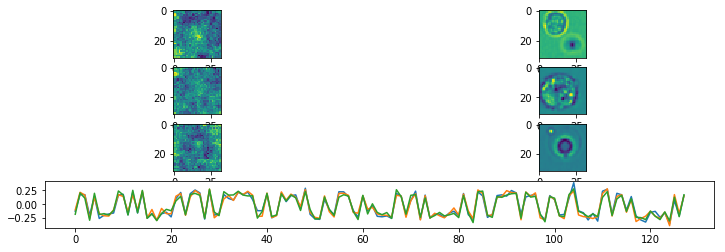

Epoch:  5 Iteration:  0 Loss:  1.9395704


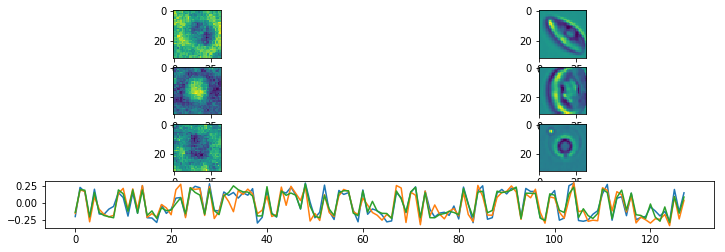

Epoch:  6 Iteration:  0 Loss:  1.7366416


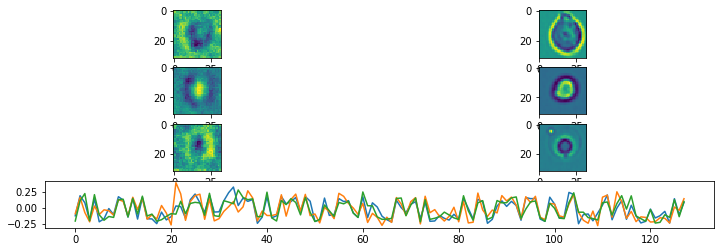

Epoch:  7 Iteration:  0 Loss:  1.5347855


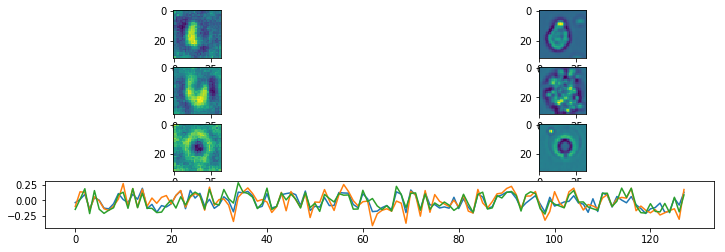

Epoch:  8 Iteration:  0 Loss:  1.3609871


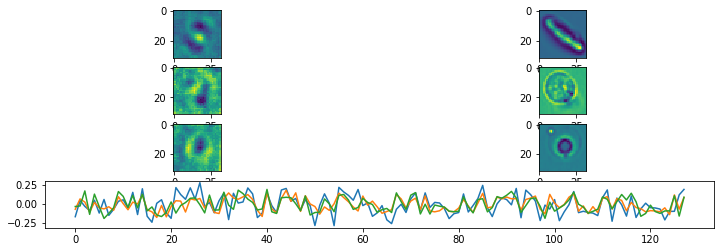

Epoch:  9 Iteration:  0 Loss:  1.2059486


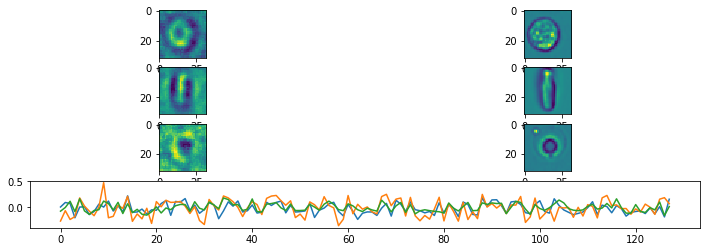

Epoch:  10 Iteration:  0 Loss:  1.0456381


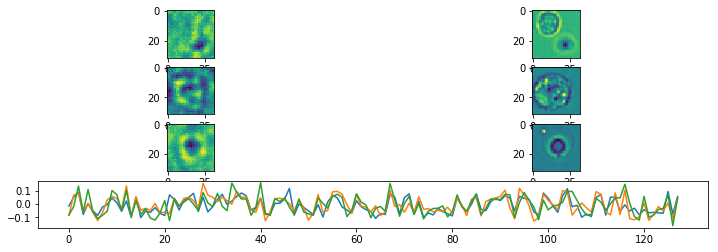

Epoch:  11 Iteration:  0 Loss:  0.9543757


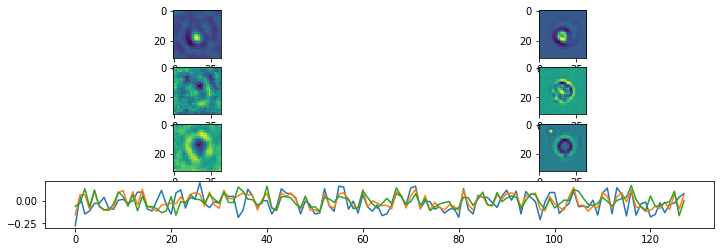

Epoch:  12 Iteration:  0 Loss:  0.86625355


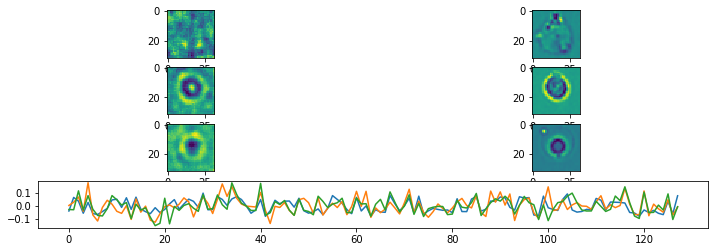

Epoch:  13 Iteration:  0 Loss:  0.79897606


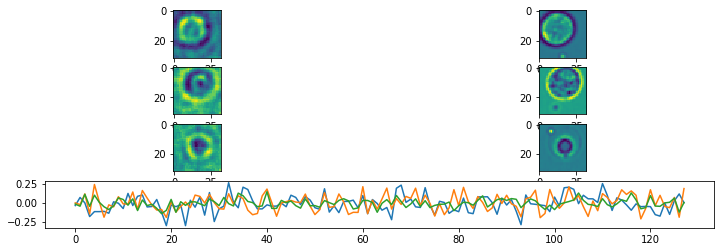

Epoch:  14 Iteration:  0 Loss:  0.73815


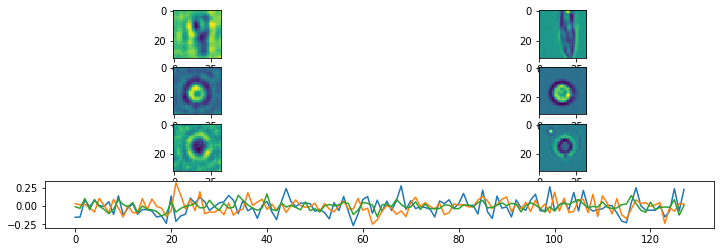

Epoch:  15 Iteration:  0 Loss:  0.69141227


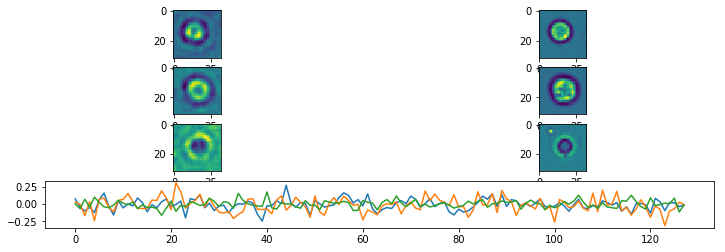

Epoch:  16 Iteration:  0 Loss:  0.6451047


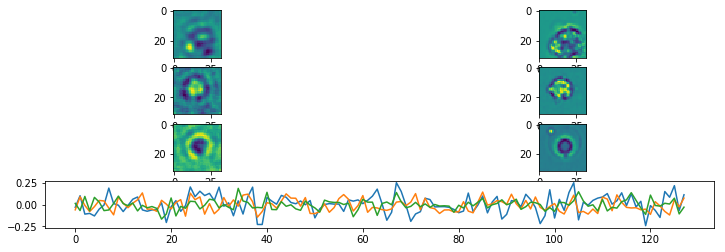

Epoch:  17 Iteration:  0 Loss:  0.6124583


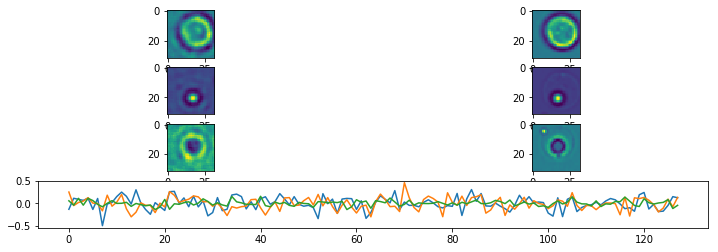

Epoch:  18 Iteration:  0 Loss:  0.57606953


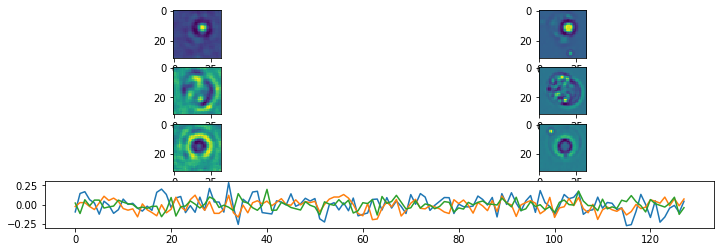

Epoch:  19 Iteration:  0 Loss:  0.54833657


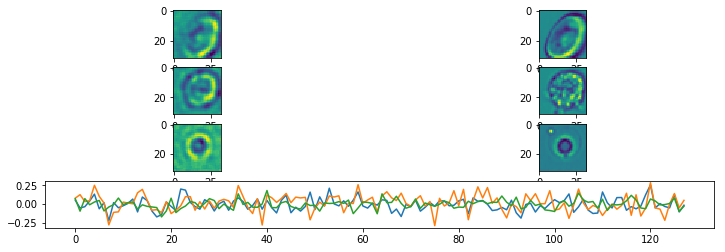

Epoch:  20 Iteration:  0 Loss:  0.52142143


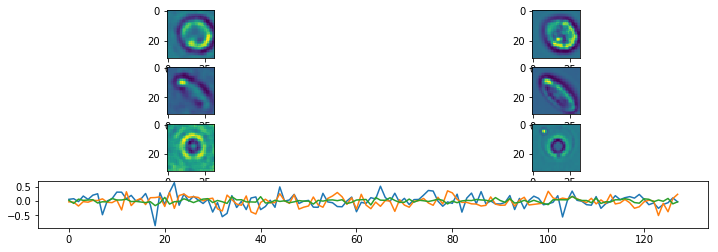

Epoch:  21 Iteration:  0 Loss:  0.4983149


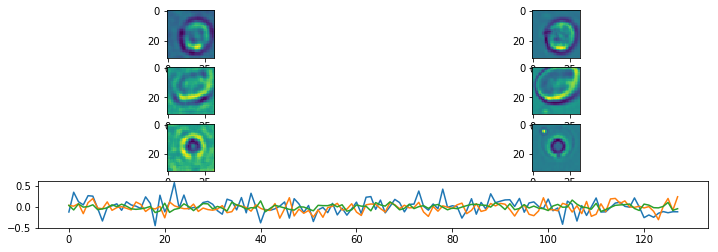

Epoch:  22 Iteration:  0 Loss:  0.47488442


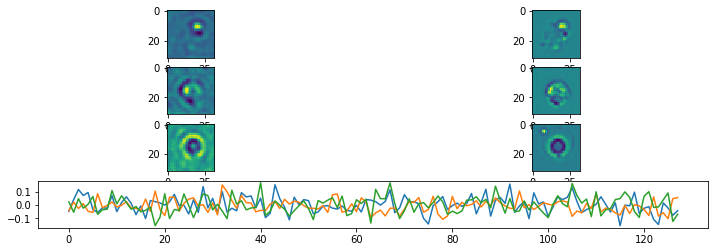

Epoch:  23 Iteration:  0 Loss:  0.4509099


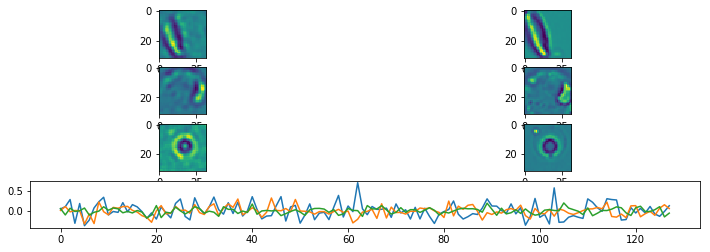

Epoch:  24 Iteration:  0 Loss:  0.4321806


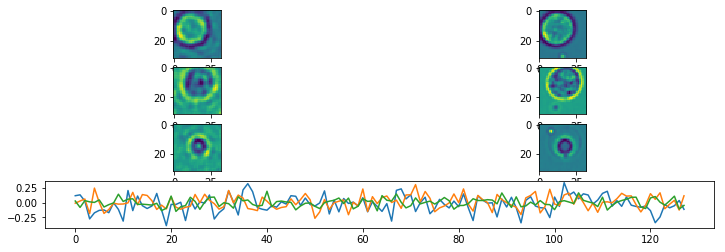

Epoch:  25 Iteration:  0 Loss:  0.42063844


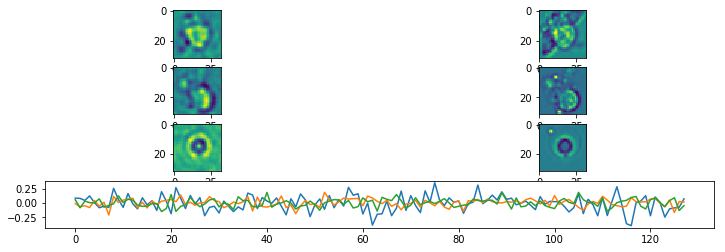

Epoch:  26 Iteration:  0 Loss:  0.40699387


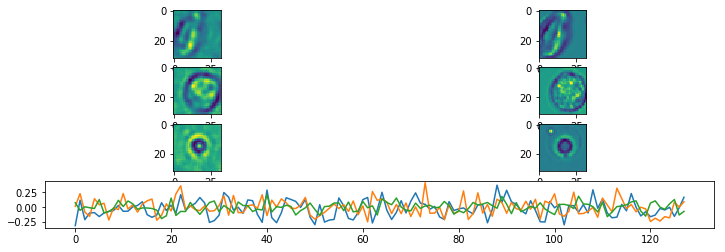

Epoch:  27 Iteration:  0 Loss:  0.39081478


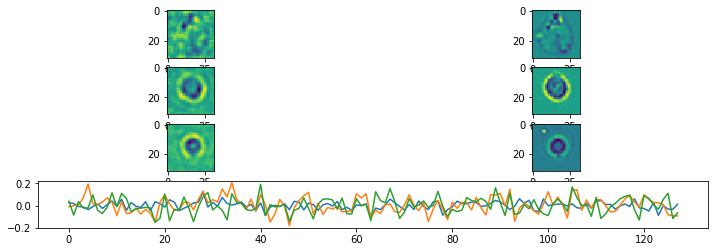

Epoch:  28 Iteration:  0 Loss:  0.38184395


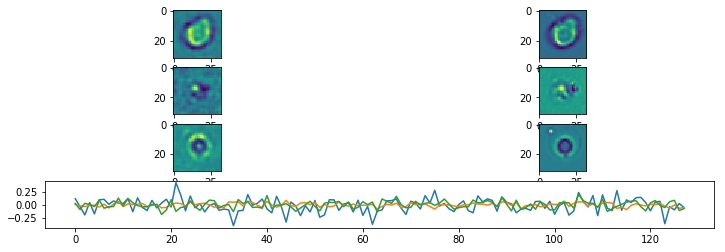

Epoch:  29 Iteration:  0 Loss:  0.36519426


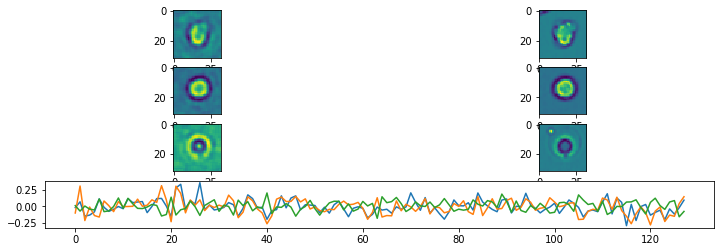

Epoch:  30 Iteration:  0 Loss:  0.36180902


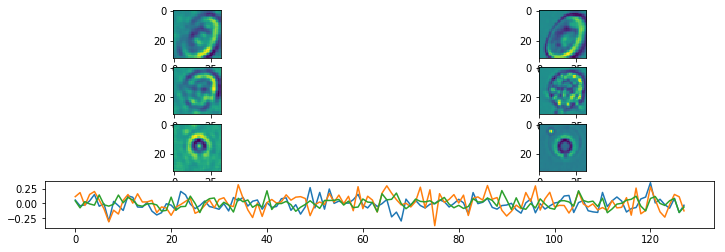

Epoch:  31 Iteration:  0 Loss:  0.35191804


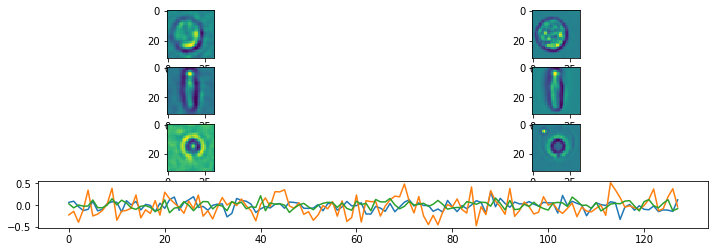

Epoch:  32 Iteration:  0 Loss:  0.34613025


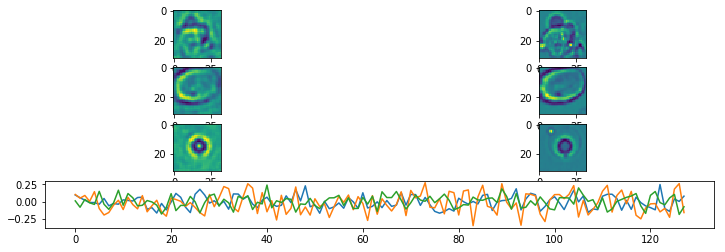

Epoch:  33 Iteration:  0 Loss:  0.3354042


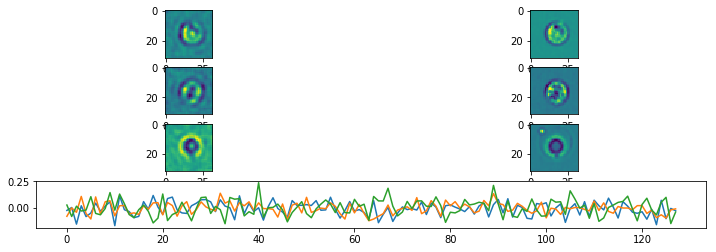

Epoch:  34 Iteration:  0 Loss:  0.3324135


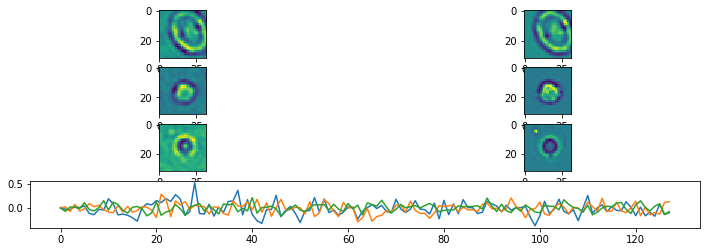

Epoch:  35 Iteration:  0 Loss:  0.32522076


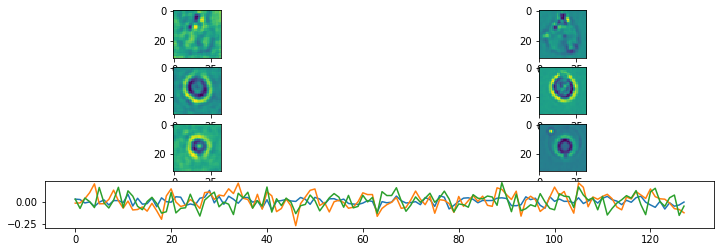

Epoch:  36 Iteration:  0 Loss:  0.32143176


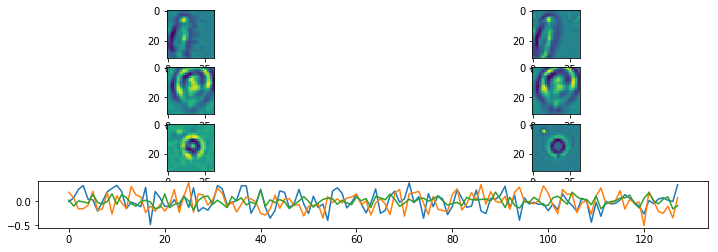

Epoch:  37 Iteration:  0 Loss:  0.308378


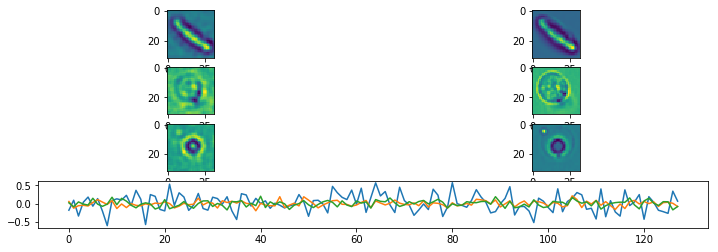

Epoch:  38 Iteration:  0 Loss:  0.304413


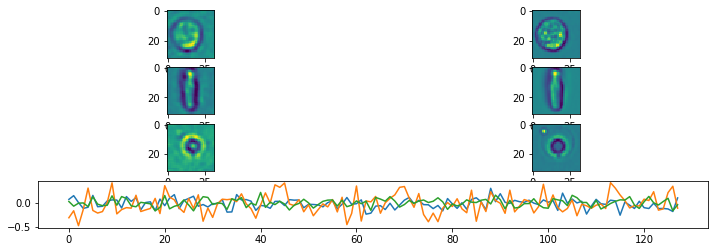

Epoch:  39 Iteration:  0 Loss:  0.30477858


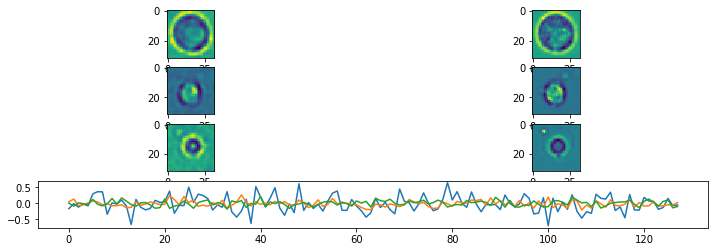

Epoch:  40 Iteration:  0 Loss:  0.29575303


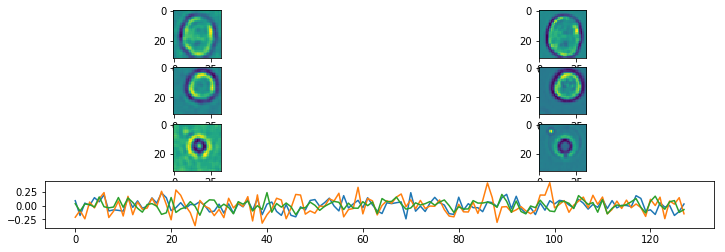

Epoch:  41 Iteration:  0 Loss:  0.2908824


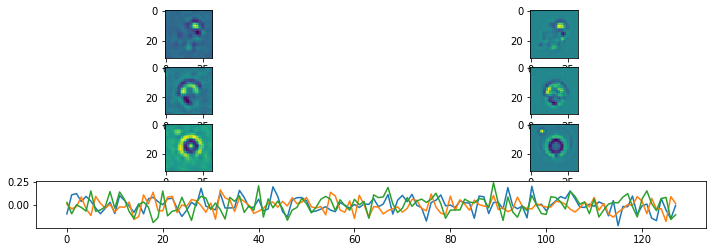

Epoch:  42 Iteration:  0 Loss:  0.28316396


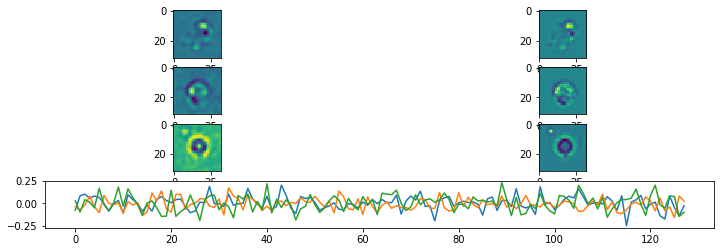

Epoch:  43 Iteration:  0 Loss:  0.278418


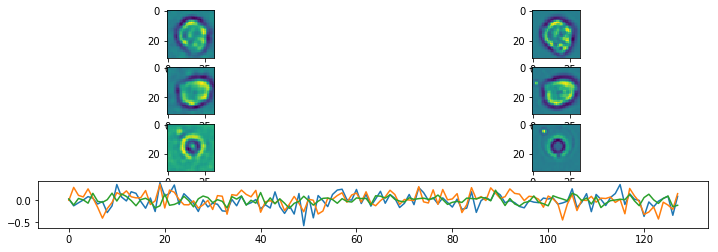

Epoch:  44 Iteration:  0 Loss:  0.27348053


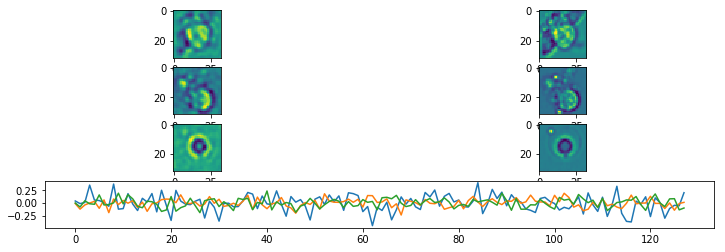

Epoch:  45 Iteration:  0 Loss:  0.2746446


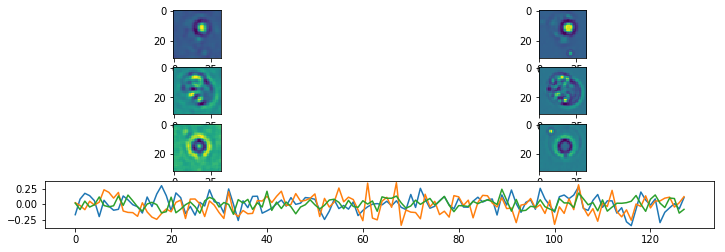

Epoch:  46 Iteration:  0 Loss:  0.27087095


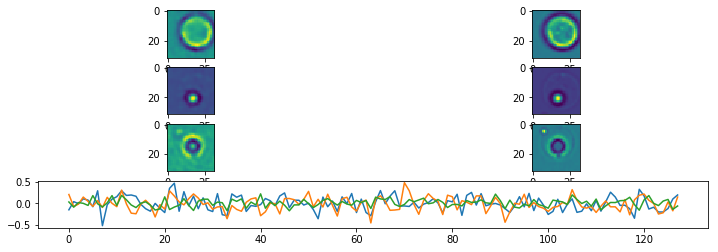

Epoch:  47 Iteration:  0 Loss:  0.26868337


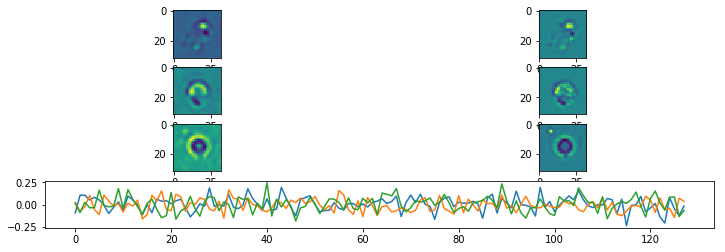

Epoch:  48 Iteration:  0 Loss:  0.26725405


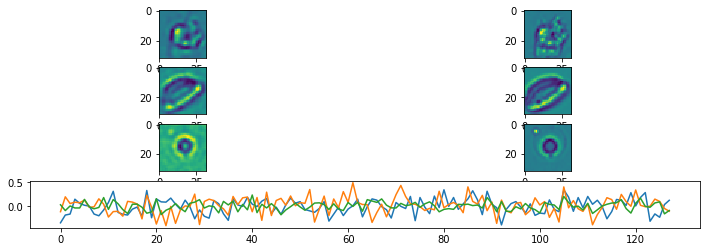

Epoch:  49 Iteration:  0 Loss:  0.2620314


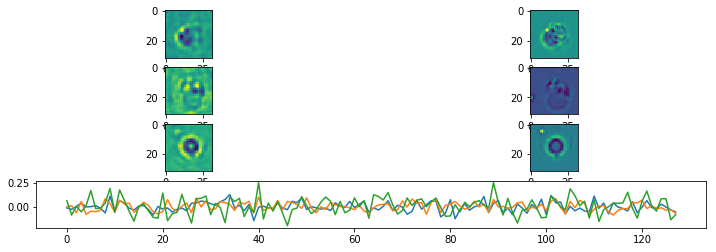

Epoch:  50 Iteration:  0 Loss:  0.25965506


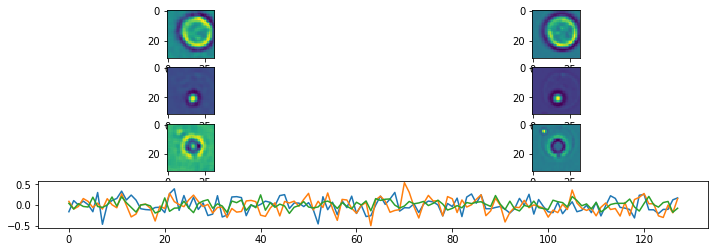

Epoch:  51 Iteration:  0 Loss:  0.25841615


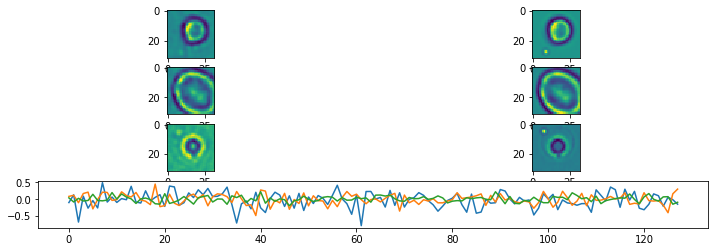

Epoch:  52 Iteration:  0 Loss:  0.25933567


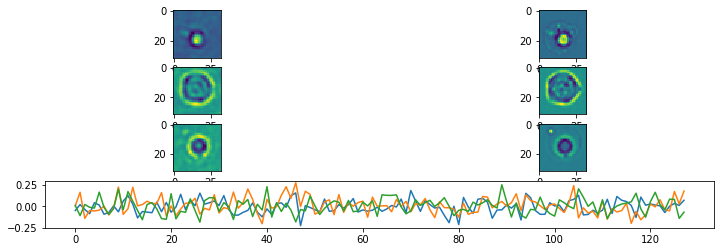

Epoch:  53 Iteration:  0 Loss:  0.24909633


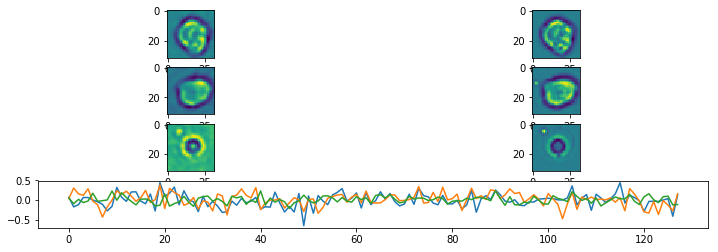

Epoch:  54 Iteration:  0 Loss:  0.25195265


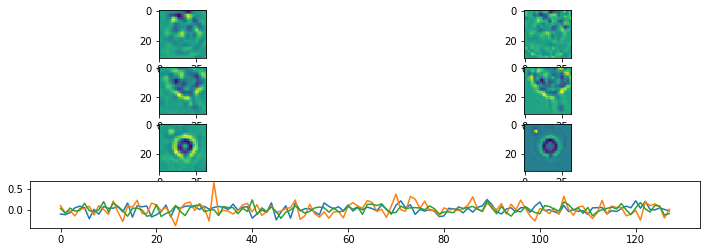

Epoch:  55 Iteration:  0 Loss:  0.2483927


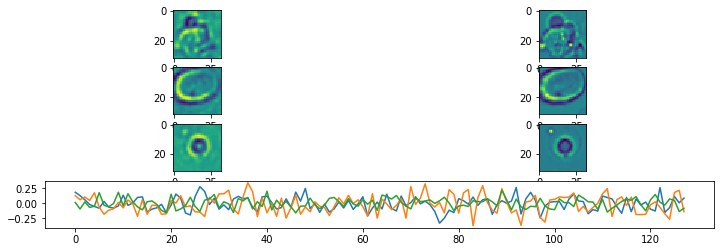

Epoch:  56 Iteration:  0 Loss:  0.24343571


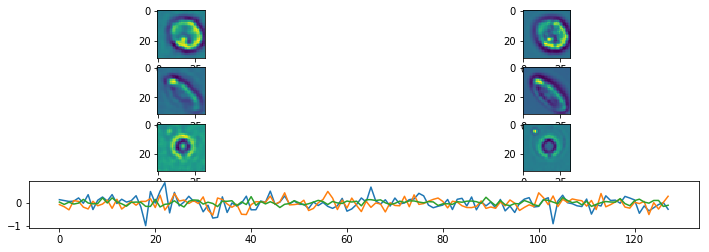

Epoch:  57 Iteration:  0 Loss:  0.25071386


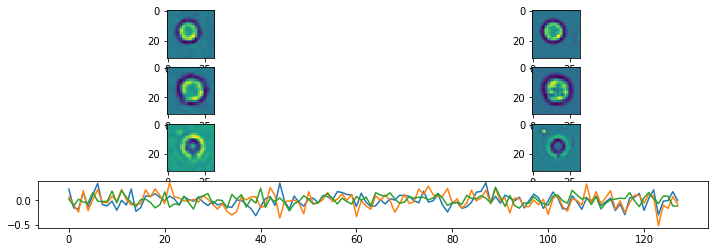

Epoch:  58 Iteration:  0 Loss:  0.24205348


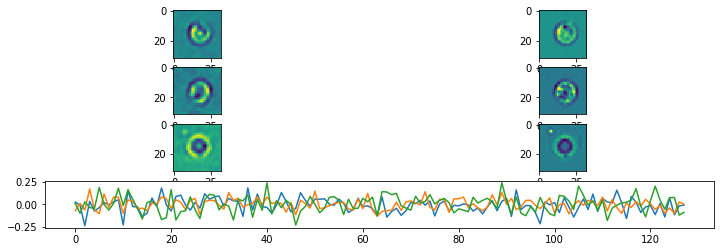

Epoch:  59 Iteration:  0 Loss:  0.24892698


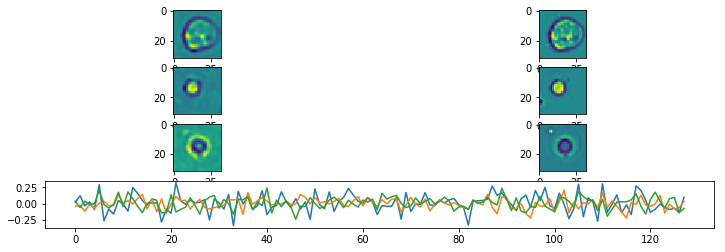

Done


In [11]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 1
p_channels = [0]
p_nepochs = 60
p_batchsize = 64
p_learning_rate = 0.00008  #.00005
p_restore = False
p_latent_size = 128

enc_sizes = [(64, 3), (128, 3), (256, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = 0.8

params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes

autoencoder_train.train(p_mmdict, p_df, params, 500, '/v/Checkpoints/Cytometry/NormedToSetMax')